In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import kernel
from deflected_subgradient import solveDeflected
from SVR import *
import matplotlib.pyplot as plt
import random

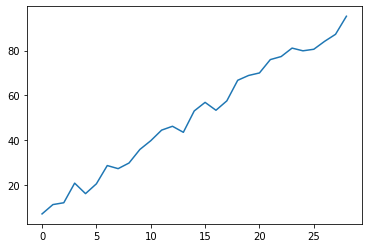

In [2]:
x = np.vstack(np.arange(1,30,1))
# y = np.array([[45000],[50000],[60000],[80000],[110000],[150000],[200000],[300000],[500000],[1000000]])
y = np.array([3*x[i]+random.uniform(1,10) for i in range(len(x))])
plt.plot(y)
plt.show()

In [3]:
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)

vareps = optim_args['vareps'] if 'vareps' in optim_args else 0.1
    maxiter = optim_args['maxiter'] if 'maxiter' in optim_args else 10000
    deltares = optim_args['deltares'] if 'deltares' in optim_args else 1e-4
    rho = optim_args['rho'] if 'rho' in optim_args else 0.95
    eps = optim_args['eps'] if 'eps' in optim_args else 1e-1
    alpha = optim_args['alpha'] if 'alpha' in optim_args else 0.7
    psi = optim_args['psi'] if 'psi' in optim_args else 0.7
    return vareps, maxiter, deltares, rho, eps, alpha, psi

In [4]:
K = kernel.linear(x)
box = 10.0
x_init = np.zeros(x.shape)
beta = solveDeflected(x_init, y, K, box, {'eps':1e-2, 'maxiter':1e+3}, True)

i:    0 - v: 0.000000 - fref:  inf - ||g||: 5.385165 - delta: 0.000000e+00 - ||gdiff||:  inf - eps: 1.000000e-02
i:    1 - v: -0.000091 - fref: 0.000000 - ||g||: 4.922150 - delta: 1.000000e-04 - ||gdiff||: 0.463015 - eps: 1.000000e-02
i:    2 - v: -0.007588 - fref: -0.000091 - ||g||: 4.878353 - delta: 1.000000e-02 - ||gdiff||: 0.043797 - eps: 1.000000e-02
i:    3 - v: -0.014690 - fref: -0.007588 - ||g||: 4.836522 - delta: 1.000000e-02 - ||gdiff||: 0.041831 - eps: 1.000000e-02
i:    4 - v: -0.021681 - fref: -0.014690 - ||g||: 4.795004 - delta: 1.000000e-02 - ||gdiff||: 0.041517 - eps: 1.000000e-02
i:    5 - v: -0.028639 - fref: -0.021681 - ||g||: 4.753337 - delta: 1.000000e-02 - ||gdiff||: 0.041668 - eps: 1.000000e-02
i:    6 - v: -0.035586 - fref: -0.028639 - ||g||: 4.715163 - delta: 1.000000e-02 - ||gdiff||: 0.038173 - eps: 1.000000e-02
i:    7 - v: -0.042524 - fref: -0.035586 - ||g||: 4.669105 - delta: 1.000000e-02 - ||gdiff||: 0.046058 - eps: 1.000000e-02
i:    8 - v: -0.049465 - fr

i:  190 - v: -0.736217 - fref: -0.735726 - ||g||: 0.459727 - delta: 1.000000e-02 - ||gdiff||: -0.041190 - eps: 1.000000e-02
i:  191 - v: -0.739032 - fref: -0.736217 - ||g||: 0.383945 - delta: 1.000000e-02 - ||gdiff||: 0.075782 - eps: 1.000000e-02
i:  192 - v: -0.740820 - fref: -0.739032 - ||g||: 0.354726 - delta: 1.000000e-02 - ||gdiff||: 0.029219 - eps: 1.000000e-02
i:  193 - v: -0.743303 - fref: -0.740820 - ||g||: 0.368632 - delta: 1.000000e-02 - ||gdiff||: -0.013905 - eps: 1.000000e-02
i:  194 - v: -0.741951 - fref: -0.743303 - ||g||: 0.523419 - delta: 1.000000e-02 - ||gdiff||: -0.154788 - eps: 1.000000e-02
i:  195 - v: -0.746502 - fref: -0.743303 - ||g||: 0.379490 - delta: 1.000000e-02 - ||gdiff||: 0.143929 - eps: 1.000000e-02
i:  196 - v: -0.748729 - fref: -0.746502 - ||g||: 0.369270 - delta: 1.000000e-02 - ||gdiff||: 0.010220 - eps: 1.000000e-02
i:  197 - v: -0.750132 - fref: -0.748729 - ||g||: 0.364434 - delta: 1.000000e-02 - ||gdiff||: 0.004836 - eps: 1.000000e-02
i:  198 - v: 

i:  381 - v: -0.984435 - fref: -0.984156 - ||g||: 0.339030 - delta: 1.000000e-03 - ||gdiff||: -0.041517 - eps: 1.000000e-03
i:  382 - v: -0.984780 - fref: -0.984435 - ||g||: 0.318893 - delta: 1.000000e-03 - ||gdiff||: 0.020136 - eps: 1.000000e-03
i:  383 - v: -0.984729 - fref: -0.984780 - ||g||: 0.326412 - delta: 1.000000e-03 - ||gdiff||: -0.007519 - eps: 1.000000e-03
i:  384 - v: -0.985232 - fref: -0.984780 - ||g||: 0.245122 - delta: 1.000000e-03 - ||gdiff||: 0.081291 - eps: 1.000000e-03
i:  385 - v: -0.985352 - fref: -0.985232 - ||g||: 0.404002 - delta: 1.000000e-03 - ||gdiff||: -0.158880 - eps: 1.000000e-03
i:  386 - v: -0.985631 - fref: -0.985352 - ||g||: 0.294927 - delta: 1.000000e-03 - ||gdiff||: 0.109074 - eps: 1.000000e-03
i:  387 - v: -0.985895 - fref: -0.985631 - ||g||: 0.356235 - delta: 1.000000e-03 - ||gdiff||: -0.061307 - eps: 1.000000e-03
i:  388 - v: -0.986082 - fref: -0.985895 - ||g||: 0.231742 - delta: 1.000000e-03 - ||gdiff||: 0.124493 - eps: 1.000000e-03
i:  389 - v:

i:  602 - v: -1.026986 - fref: -1.026960 - ||g||: 0.278405 - delta: 1.026960e-04 - ||gdiff||: 0.016845 - eps: 1.000000e-04
i:  603 - v: -1.027002 - fref: -1.026986 - ||g||: 0.258208 - delta: 1.026986e-04 - ||gdiff||: 0.020197 - eps: 1.000000e-04
i:  604 - v: -1.027054 - fref: -1.027002 - ||g||: 0.437255 - delta: 1.027002e-04 - ||gdiff||: -0.179047 - eps: 1.000000e-04
i:  605 - v: -1.027075 - fref: -1.027054 - ||g||: 0.277942 - delta: 1.027054e-04 - ||gdiff||: 0.159313 - eps: 1.000000e-04
i:  606 - v: -1.027097 - fref: -1.027075 - ||g||: 0.369929 - delta: 1.027075e-04 - ||gdiff||: -0.091988 - eps: 1.000000e-04
i:  607 - v: -1.027125 - fref: -1.027097 - ||g||: 0.226481 - delta: 1.027097e-04 - ||gdiff||: 0.143448 - eps: 1.000000e-04
i:  608 - v: -1.027150 - fref: -1.027125 - ||g||: 0.339795 - delta: 1.027125e-04 - ||gdiff||: -0.113314 - eps: 1.000000e-04
i:  609 - v: -1.027187 - fref: -1.027150 - ||g||: 0.331487 - delta: 1.027150e-04 - ||gdiff||: 0.008309 - eps: 1.000000e-04
i:  610 - v: 

i:  810 - v: -1.031390 - fref: -1.031385 - ||g||: 0.226427 - delta: 1.031385e-05 - ||gdiff||: 0.091940 - eps: 1.000000e-05
i:  811 - v: -1.031390 - fref: -1.031390 - ||g||: 0.304654 - delta: 1.031390e-05 - ||gdiff||: -0.078227 - eps: 1.000000e-05
i:  812 - v: -1.031395 - fref: -1.031390 - ||g||: 0.313414 - delta: 1.031390e-05 - ||gdiff||: -0.008760 - eps: 1.000000e-05
i:  813 - v: -1.031398 - fref: -1.031395 - ||g||: 0.268207 - delta: 1.031395e-05 - ||gdiff||: 0.045208 - eps: 1.000000e-05
i:  814 - v: -1.031400 - fref: -1.031398 - ||g||: 0.448904 - delta: 1.031398e-05 - ||gdiff||: -0.180697 - eps: 1.000000e-05
i:  815 - v: -1.031403 - fref: -1.031400 - ||g||: 0.261980 - delta: 1.031400e-05 - ||gdiff||: 0.186924 - eps: 1.000000e-05
i:  816 - v: -1.031404 - fref: -1.031403 - ||g||: 0.238245 - delta: 1.031403e-05 - ||gdiff||: 0.023735 - eps: 1.000000e-05
i:  817 - v: -1.031410 - fref: -1.031404 - ||g||: 0.376915 - delta: 1.031404e-05 - ||gdiff||: -0.138671 - eps: 1.000000e-05
i:  818 - v:

In [5]:
beta

array([[-9.94729090e-06],
       [ 1.20750631e-06],
       [-1.20764493e-05],
       [ 1.19916842e+00],
       [-1.75688008e+00],
       [-2.27691976e-01],
       [ 1.29518911e-05],
       [-8.77807384e-06],
       [-4.05169093e-02],
       [ 4.80636863e-07],
       [ 1.00205848e-05],
       [ 4.30986184e-01],
       [ 1.08879762e-05],
       [-1.71314478e+00],
       [ 3.30480794e-06],
       [ 6.86512277e-01],
       [-8.89598334e-01],
       [-2.28299828e-07],
       [ 1.53320175e+00],
       [ 5.24891770e-01],
       [ 3.36019953e-06],
       [ 1.67285089e+00],
       [ 6.21461725e-06],
       [ 6.06159639e-01],
       [-6.33090700e-06],
       [-1.07841206e+00],
       [-5.13032464e-01],
       [-4.34506120e-01],
       [ 7.15454230e-07]])

In [6]:
mask = np.logical_or(beta > 1e-5, beta < -1e-5)
support = np.vstack(np.vstack(np.arange(len(beta)))[mask])
suppvect = np.vstack(x[mask])
y_sv = np.vstack(y[mask])
beta = np.vstack(beta[mask])
b = 0
for i in range(beta.size):
    b += y_sv[i]
    b -= np.sum(beta * K[support[i], np.hstack(mask)])
b -= 0.1 # -eps
b /= len(beta) # (why ?) (computing average bias ??)
W = np.dot(np.transpose(beta), suppvect)

suppvect = suppvect[[0,3,7,8,9]]

In [7]:
[-0.00164961]

[-0.00164961]

In [8]:
sum,count = 0,0
for el1,el2 in zip(beta,y_sv):
    print(el1, el2, W)
    print(el2-W)
    sum+=el2-W
    count+=1
    print()
print("b:",sum/count)

[-1.20764493e-05] [-1.49557638] [[0.9864121]]
[[-2.48198848]]

[1.19916842] [-1.15727418] [[0.9864121]]
[[-2.14368628]]

[-1.75688008] [-1.33823713] [[0.9864121]]
[[-2.32464923]]

[-0.22769198] [-1.16864183] [[0.9864121]]
[[-2.15505393]]

[1.29518911e-05] [-0.8536113] [[0.9864121]]
[[-1.84002341]]

[-0.04051691] [-0.80986811] [[0.9864121]]
[[-1.79628021]]

[1.00205848e-05] [-0.42483447] [[0.9864121]]
[[-1.41124657]]

[0.43098618] [-0.24195876] [[0.9864121]]
[[-1.22837086]]

[1.08879762e-05] [-0.17540224] [[0.9864121]]
[[-1.16181434]]

[-1.71314478] [-0.27956777] [[0.9864121]]
[[-1.26597987]]

[0.68651228] [0.23716597] [[0.9864121]]
[[-0.74924613]]

[-0.88959833] [0.10111316] [[0.9864121]]
[[-0.88529894]]

[1.53320175] [0.61842297] [[0.9864121]]
[[-0.36798913]]

[0.52489177] [0.70151328] [[0.9864121]]
[[-0.28489882]]

[1.67285089] [0.9755765] [[0.9864121]]
[[-0.0108356]]

[0.60615964] [1.17414082] [[0.9864121]]
[[0.18772872]]

[-1.07841206] [1.15398762] [[0.9864121]]
[[0.16757552]]

[-0

In [9]:
print(suppvect, b)

[[-1.43427433]
 [-1.31475147]
 [-1.19522861]
 [-1.07570575]
 [-0.95618289]
 [-0.71713717]
 [-0.47809144]
 [-0.35856858]
 [-0.23904572]
 [-0.11952286]
 [ 0.11952286]
 [ 0.23904572]
 [ 0.47809144]
 [ 0.5976143 ]
 [ 0.83666003]
 [ 1.07570575]
 [ 1.31475147]
 [ 1.43427433]
 [ 1.55379719]] [-0.01996043]


W : [[0.9864121]] - b: [-0.01996043]
The predicted salary of a person at 6.5 Level is  [[24.91168775]]
[-1.6505831492032794, -1.5326843528316165, -1.4147855564599536, -1.2968867600882907, -1.178987963716628, -1.0610891673449652, -0.9431903709733025, -0.8252915746016397, -0.7073927782299768, -0.589493981858314, -0.47159518548665125, -0.3536963891149884, -0.23579759274332562, -0.11789879637166281, 0.0, 0.11789879637166281, 0.23579759274332562, 0.3536963891149884, 0.47159518548665125, 0.589493981858314, 0.7073927782299768, 0.8252915746016397, 0.9431903709733025, 1.0610891673449652, 1.178987963716628, 1.2968867600882907, 1.4147855564599536, 1.5326843528316165, 1.6505831492032794]


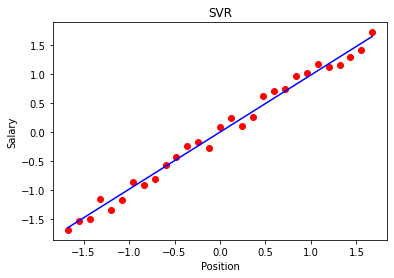

In [10]:
print(f"W : {W} - b: {b}")
b = 0

# First transform 6.5 to feature scaling
sc_X_val = sc_X.transform(np.array([[6.5]]))
# Second predict the value
scaled_y_pred = predict_linear(W, b, sc_X_val)
# scaled_y_pred = predict_poly(W, b, beta, sc_X_val, suppvect, DEG)
# Third - since this is scaled - we have to inverse transform
y_pred = sc_y.inverse_transform(scaled_y_pred) 
print('The predicted salary of a person at 6.5 Level is ', y_pred)

plt.scatter(x, y , color="red")
pred = [float(predict_linear(W, b, x[i])) for i in range(x.size)]
#pred = [float(predict_poly(W, b, beta, x[i], suppvect, DEG)) for i in range(x.size)]
print(pred)
# X_grid = np.arange(min(x), max(x), 0.01) #this step required because data is feature scaled.
# X_grid = X_grid.reshape((len(X_grid), 1))
# x = X_grid
# pred = [float(predict_rbf(W, b, beta, elem, suppvect)) for elem in X_grid]
plt.plot(x, pred, color="blue")
plt.title("SVR")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

from scipy import optimize
g,dprev = np.array([1,2,3,4]),np.array([1,2,3,4])
def f(alpha):   # The rosenbrock function
    return np.linalg.norm(alpha*g+(1-alpha)*dprev)**2
alpha = 0.7
alpha = optimize.minimize(alpha,f, bounds=(0,1), method='bounded').x
alpha

PREDICTION:  [24.9087679]


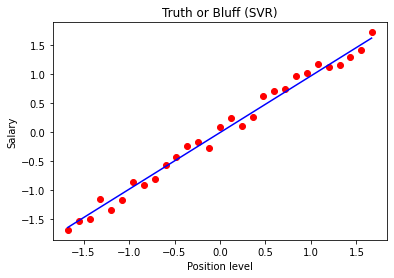

In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
Y = np.hstack(y)
X = x
regressor.fit(X, Y)
y_scal = sc_X.transform(np.array([[6.5]]))
y_pred = regressor.predict(y_scal)
y_pred = sc_y.inverse_transform(y_pred)
print("PREDICTION: ",y_pred)
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [12]:
regressor.support_vectors_

array([[-1.31475147],
       [-1.19522861],
       [-1.07570575],
       [-0.71713717],
       [-0.35856858],
       [-0.11952286],
       [ 0.11952286],
       [ 0.23904572],
       [ 0.47809144],
       [ 0.5976143 ],
       [ 0.83666003],
       [ 1.07570575],
       [ 1.31475147],
       [ 1.43427433],
       [ 1.55379719]])

In [13]:
regressor.support_

array([ 3,  4,  5,  8, 11, 13, 15, 16, 18, 19, 21, 23, 25, 26, 27])

In [14]:
regressor.epsilon

0.1

In [15]:
regressor.max_iter

-1

In [16]:
regressor.intercept_

array([-0.00814469])

In [17]:
params = regressor.get_params()

In [18]:
params.keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [19]:
params['gamma']

'scale'

In [20]:
params['C']

1.0

In [21]:
regressor.coef_

array([[0.97850654]])